In [32]:
import numpy as np
import matplotlib.pyplot as plt
import nanosphere_utils as ns
import scipy.signal as sig
import importlib

In [13]:
## simulate data and apply pulse reconstruction to look at the acheivable resolution

In [196]:
Fs = 2e6 ## sampling rate in Hz
T = 1 # record length in seconds (this needs to be long compared to 1/gamma or else weird effects on impulse from finite length)

sample_time = 1/Fs
t = np.arange(0, T, sample_time)

## trim to the nearest power of 2 in length
pow2_len = 2**int(np.log2(len(t)))
t = t[:pow2_len]

num_samples = len(t)

In [217]:
importlib.reload(ns)

noise_data = ns.generate_simulated_event(1, num_samples, sample_time, imprecision_amp=1e-15, impulse_amp=1)

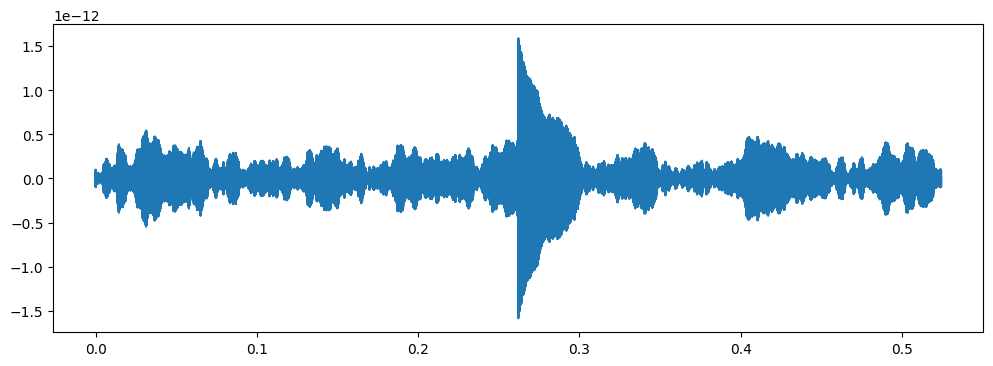

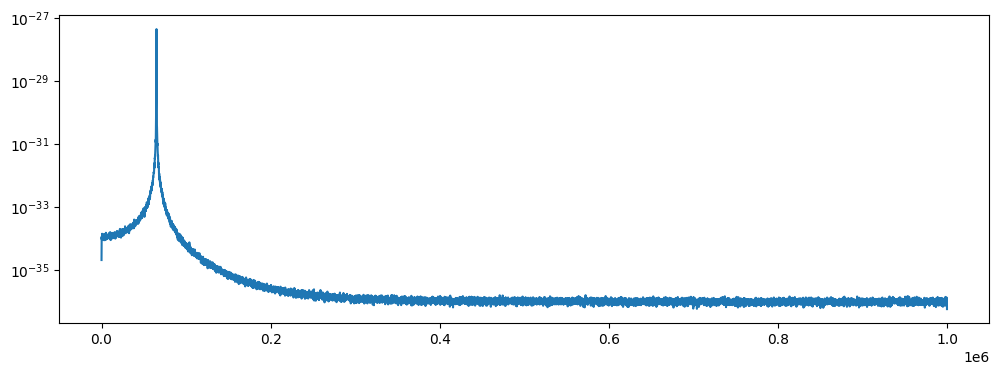

In [218]:
plt.figure(figsize=(12,4))
plt.plot(t, noise_data)
#plt.xlim(0,2e-3)


freqs, psd = sig.welch(noise_data, fs=Fs, nperseg=2**15)
#psd = np.abs( np.fft.rfft(noise_data) )**2
#freqs = np.fft.rfftfreq(num_samples, d=sample_time)

plt.figure(figsize=(12, 4))
plt.semilogy(freqs, psd)

plt.show()